In [1]:
import numpy as np
from scipy.integrate import quad
import math
import matplotlib.pyplot as plt

In [2]:
global glo_coeff #this variable will be accessible globally

In [3]:
#returns the norm
def get_norm(k):
    return ((2**(1-k))/math.pi)**0.25

In [4]:
#returns the coeffienct of the dot product
def get_exp(k,l):
    return (2**(-k) + 2**(-l))

In [5]:
#returns integrand
def get_integrand(x):
    return np.exp(-glo_coeff*x**(2))

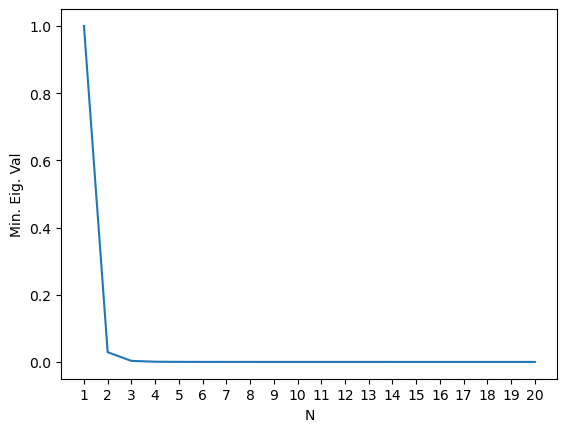

In [10]:
maxN=20 
N_list=[]
min_eig_list=[]

for N in range(1,maxN+1):
    S=np.zeros((N,N))
    for k in range(N):
        for l in range(N):
            glo_coeff = get_exp(k,l)
            result,error = quad(get_integrand,-np.inf,np.inf)
            S[k][l] = get_norm(k)*get_norm(l)*result
    min_eig_list.append(np.min(np.linalg.eigvals(S)))
    N_list.append(N)

plt.plot(N_list,min_eig_list)
plt.xlabel('N')
plt.ylabel('Min. Eig. Val')
plt.xticks(range(1,maxN+1))
plt.show()